In [1]:
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [4]:
from sklearn.datasets import make_circles
from matplotlib.colors import ListedColormap

In [20]:
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [8]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

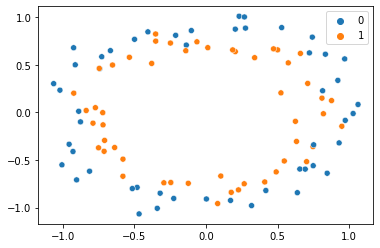

In [6]:
sns.scatterplot(x[:,0], x[:,1], hue=y)
plt.show()

In [9]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=5000)

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 41ms/step - loss: 0.2059 - accuracy: 0.9250 - val_loss: 0.4595 - val_accuracy: 0.8500
Epoch 2502/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.2058 - accuracy: 0.9250 - val_loss: 0.4641 - val_accuracy: 0.8500
Epoch 2503/5000
3/3 [==============================] - 0s 40ms/step - loss: 0.2060 - accuracy: 0.9250 - val_loss: 0.4609 - val_accuracy: 0.8500
Epoch 2504/5000
3/3 [==============================] - 0s 39ms/step - loss: 0.2052 - accuracy: 0.9250 - val_loss: 0.4611 - val_accuracy: 0.8500
Epoch 2505/5000
3/3 [==============================] - 0s 37ms/step - loss: 0.2067 - accuracy: 0.9125 - val_loss: 0.4641 - val_accuracy: 0.8500
Epoch 2506/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.2061 - accuracy: 0.9250 - val_loss: 0.4594 - val_accuracy: 0.8500
Epoch 2507/5000
3/3 [==============================] - 0s 39ms/step - loss: 0.2065 - accuracy: 0.9250

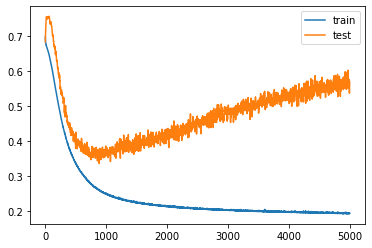

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Early Stopping

In [22]:
model1 = Sequential()
model1.add(Dense(256, input_dim=2, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               768       
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [23]:
model1.compile(optimizer = 'adam', loss='binary_crossentropy', metrics =['accuracy'])

In [29]:
# parameter
callback = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.0001, 
    patience=50, 
    verbose=1, 
    mode='auto', 
    baseline=None, 
    restore_best_weights=False, 
    
)
# verbose = 1 means we can see the output as how many times epochs runs

In [31]:
history = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5000, callbacks=callback)

Epoch 1/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.3111 - accuracy: 0.8750 - val_loss: 0.3794 - val_accuracy: 0.8500
Epoch 2/5000
3/3 [==============================] - 0s 18ms/step - loss: 0.3109 - accuracy: 0.8750 - val_loss: 0.3822 - val_accuracy: 0.8500
Epoch 3/5000
3/3 [==============================] - 0s 16ms/step - loss: 0.3111 - accuracy: 0.8875 - val_loss: 0.3891 - val_accuracy: 0.8500
Epoch 4/5000
3/3 [==============================] - 0s 15ms/step - loss: 0.3106 - accuracy: 0.8875 - val_loss: 0.3899 - val_accuracy: 0.8500
Epoch 5/5000
3/3 [==============================] - 0s 16ms/step - loss: 0.3104 - accuracy: 0.8875 - val_loss: 0.3853 - val_accuracy: 0.8500
Epoch 6/5000
3/3 [==============================] - 0s 16ms/step - loss: 0.3103 - accuracy: 0.8875 - val_loss: 0.3831 - val_accuracy: 0.8500
Epoch 7/5000
3/3 [==============================] - 0s 15ms/step - loss: 0.3095 - accuracy: 0.8750 - val_loss: 0.3838 - val_accuracy: 0.8500
Epoch 8/5000


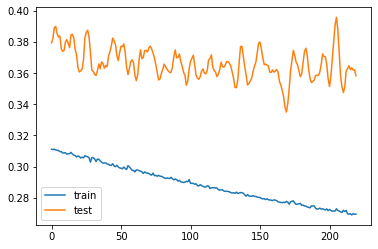

In [32]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

3888/3888 [==============================] - 6s 2ms/step


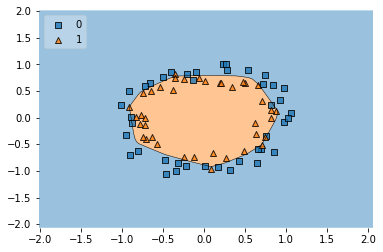

In [35]:
plot_decision_regions(x_train, y_train.ravel(), clf = model1, legend=2)
plt.show()

3888/3888 [==============================] - 6s 2ms/step


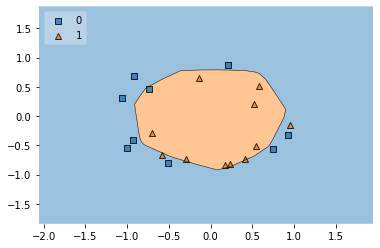

In [36]:
plot_decision_regions(x_test, y_test.ravel(), clf = model1, legend=2)
plt.show()